In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [58]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [2]:
df = pd.read_excel('D:/Data/Full Data.xlsx', sheet_name=u'全部经历')

In [3]:
df.shape

(62742, 25)

In [62]:
df = df[df[u'具体职务'] != u'学员']

In [63]:
df['year'] = df[u'起始时间（YYYY-MM-DD）'].apply(lambda x: x.year)

In [64]:
count = df['year'].value_counts().sort_index()

In [66]:
count = count.drop(count.index[-2:])

In [67]:
count = count[count.index >= 1990]

In [68]:
data = w.wsd('000001.SH', 'close', '1990-01-01', '2015-12-31', 'Period=Y')

In [69]:
pdf = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['000001.SH'])

In [70]:
count.index = pdf.index

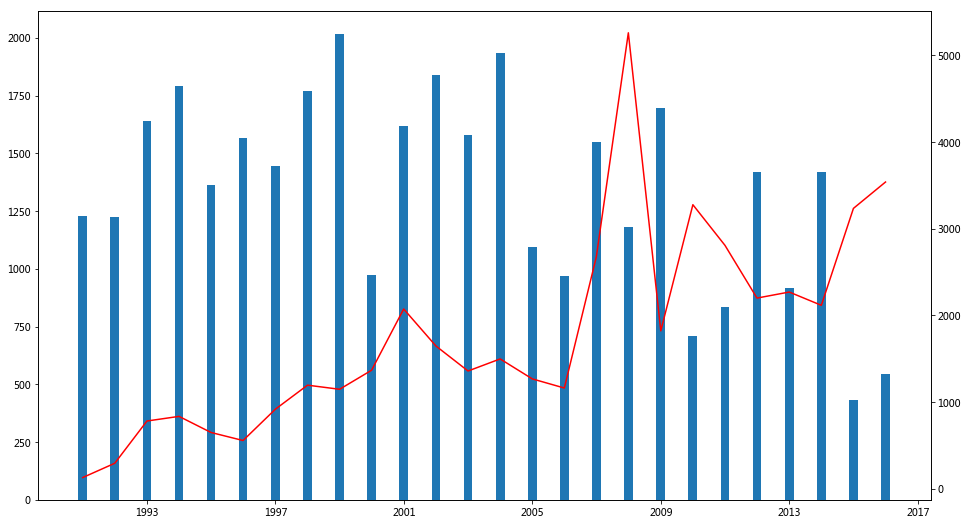

In [71]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(count.index, count, width=100)
ax2 = ax.twinx()
ax2.plot(pdf['000001.SH'], color='red')